<div align="center">
    <h1> Regression </h1>
</div>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

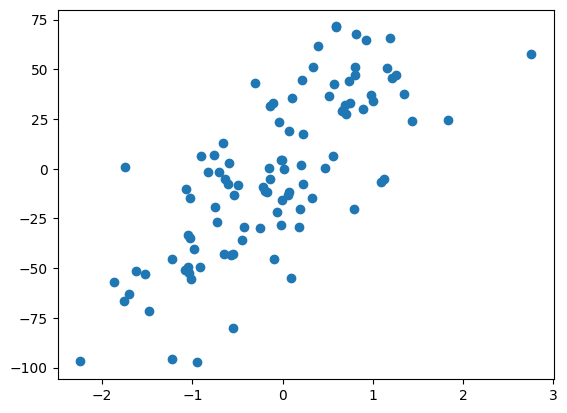

In [38]:
# Generate a dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=30)

plt.scatter(X, y)
plt.show()

# I. Linear Regression

* Least Square Method

{'slope': 34.030892289429936, 'intercept': 0.14103837422254856}


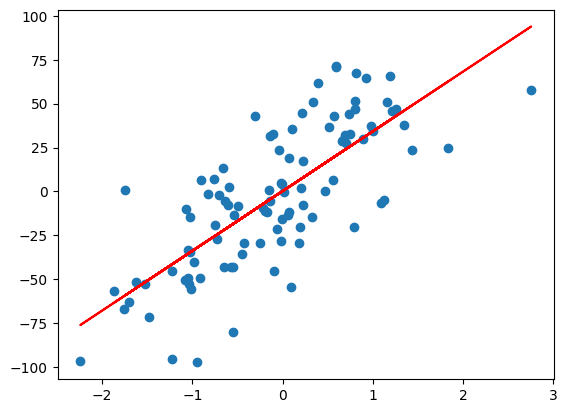

In [39]:
def least_squares(X, y): # TODO: Get wrong R^2 value (< 0)
    N = X.shape[0]
    m = N * np.sum(X * y) - np.sum(X) * np.sum(y)
    m /= N * np.sum(X**2) - np.sum(X)**2

    b = np.sum(y) - m * np.sum(X)
    b /= N

    return m, b

m, b = least_squares(X, y)
print({'slope': m, 'intercept': b})
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()

* Ordinary Least Square Method

[33.94465088]


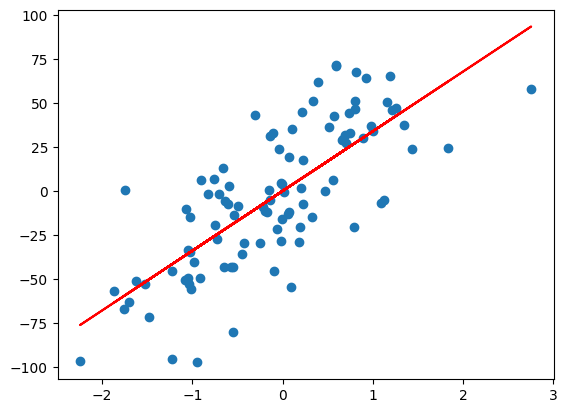

In [40]:
def ordinary_least_square(X, y):
    betta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return betta_hat

betta_hat = ordinary_least_square(X, y)
print(betta_hat)
plt.scatter(X, y)
plt.plot(X, X @ betta_hat, color='red')
plt.show()

* Polynomial Regression

{'numpy values': array([[-3.27965459e-08],
       [-1.25409343e-06],
       [ 5.05955062e-05]])}
{'custom values': array([[-3.16023187e-08],
       [-1.28996061e-06],
       [ 5.10549668e-05]])}


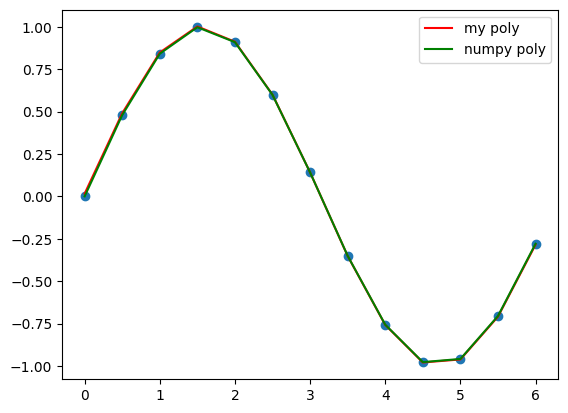

In [78]:
def polynomial_regression(X, y, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    betta_hat = ordinary_least_square(X_poly, y)
    return betta_hat, X_poly

# Generate a dataset from a sinusoide
X_poly = np.arange(0, 2*np.pi, 0.5).reshape(-1, 1)
y_poly = np.sin(X_poly)
degree = 10

betta_hat, X_poly_hat = polynomial_regression(X_poly, y_poly, degree)
numpy_poly = np.polyfit(X_poly[:, 0], y_poly, degree)

print({'numpy values' : numpy_poly[:3]})
print({'custom values': np.flip(betta_hat)[:3]})

plt.scatter(X_poly, y_poly)
plt.plot(X_poly, X_poly_hat @ betta_hat, color='red', label='my poly')
plt.plot(X_poly, np.polyval(numpy_poly, X_poly[:, 0]), color='green', label='numpy poly')
plt.legend()
plt.show()